In [13]:
import pandas as pd
import plotly.graph_objects as go
import numpy as np
%load_ext autoreload
%autoreload 2

sex_diff_count = pd.read_csv('/hpc/mydata/siyu.he/Siyu_projects/TS_project/sex_diff_count.csv',index_col=0)
sex_diff_count.index = list(range(sex_diff_count.shape[0]))

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [14]:
import sys
sys.path.append('TS_DEG_method/')
import DEG_comparison, GTEx_object, TS_object, figure_utils, utils



tissue_colors = utils.tissue_colors()

In [31]:
sex_diff_count = sex_diff_count[sex_diff_count.tissue!='Thymus']
sex_diff_count = sex_diff_count[sex_diff_count.tissue!='Small_Intestine']
sex_diff_count = sex_diff_count[sex_diff_count.tissue!='Large_Intestine']
sex_diff_count = sex_diff_count[sex_diff_count.tissue!='Lung']
sex_diff_count.index = list(range(sex_diff_count.shape[0]))

In [32]:
sex_diff_count

,tissue,cell type,male cell num,female cell num,male donor num,female donor num
0,Bladder,t cell,2191,5211,2,4
1,Bladder,transitional epithelial cell,4646,22017,2,4
2,Bladder,fibroblast,3377,9892,2,4
3,Bladder,myeloid leukocyte,1122,6518,2,4
4,Bladder,contractile cell,1120,4077,2,4
...,...,...,...,...,...,...
76,Vasculature,t cell,1942,644,2,3
77,Vasculature,fibroblast,7076,5054,2,3
78,Vasculature,myeloid leukocyte,5261,2318,2,3
79,Vasculature,endothelial cell,3154,2802,2,3


In [33]:

color =[tissue_colors[tissue_] for tissue_ in sex_diff_count['tissue'].unique()]
color += ['blue'] * len(sex_diff_count['cell type'].unique())  # Adding 'blue' for each unique cell type


In [34]:
color

['#e7969c',
 '#d6616b',
 '#cedb9c',
 '#e7cb94',
 '#ff0800',
 '#8c6d31',
 '#e7ba52',
 '#622a0f',
 '#de9ed6',
 '#393b79',
 '#b5cf6b',
 '#969696',
 '#843c39',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue']

In [35]:
sex_diff_count

,tissue,cell type,male cell num,female cell num,male donor num,female donor num
0,Bladder,t cell,2191,5211,2,4
1,Bladder,transitional epithelial cell,4646,22017,2,4
2,Bladder,fibroblast,3377,9892,2,4
3,Bladder,myeloid leukocyte,1122,6518,2,4
4,Bladder,contractile cell,1120,4077,2,4
...,...,...,...,...,...,...
76,Vasculature,t cell,1942,644,2,3
77,Vasculature,fibroblast,7076,5054,2,3
78,Vasculature,myeloid leukocyte,5261,2318,2,3
79,Vasculature,endothelial cell,3154,2802,2,3


In [36]:
all_nodes = list(sorted(sex_diff_count.tissue.unique()))+list(sex_diff_count['cell type'].unique())
link_source = []
link_target = []


for i in range(sex_diff_count.shape[0]):
    link_source.append(all_nodes.index(sex_diff_count.loc[i,'tissue']))
    link_target.append(all_nodes.index(sex_diff_count.loc[i,'cell type']))


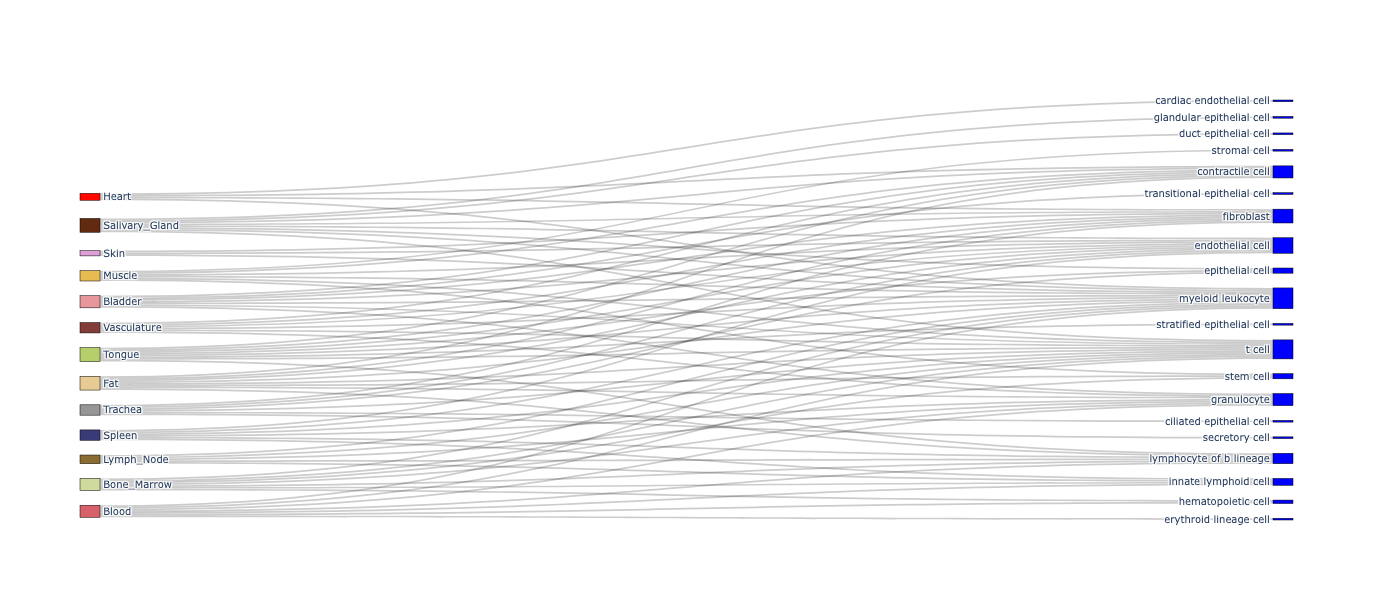

In [37]:

fig = go.Figure(data=[go.Sankey(
    node = dict(
      pad = 20,
      thickness = 20,
      line = dict(color = "black", width = 0.5),
      label = all_nodes,
      color = color
    ),
    link = dict(
      source = link_source,
      target = link_target,
      value = [1]*len(link_source)
  ))])

fig.update_layout(title_text="", font_size=10,width=500, height=600)
fig.show()
